In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# #PHISHING WEBSITES
# url = 'https://archive.ics.uci.edu/static/public/967/data.csv'

# response = requests.get(url)

# if response.status_code == 200:
#     data = pd.read_csv(io.StringIO(response.text))
#     save_path = 'data.csv'
#     data.to_csv(save_path, index=False)
# else:
#     print(f"Error downloading CSV: {response.status_code}")

In [ ]:
# def split_csv(input_file, output_dir, chunk_size):
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     with open(input_file, 'r', newline='', encoding='utf-8') as csvfile:
#         reader = csv.reader(csvfile)
#         header = next(reader) 

#         file_count = 1
#         current_chunk = 0
#         output_file = os.path.join(output_dir, f'data_{file_count}.csv')

#         for row in reader:
#             if current_chunk == 0:
#                 with open(output_file, 'w', newline='', encoding='utf-8') as out_csvfile:
#                     writer = csv.writer(out_csvfile)
#                     writer.writerow(header) 

#             with open(output_file, 'a', newline='', encoding='utf-8') as out_csvfile:
#                 writer = csv.writer(out_csvfile)
#                 writer.writerow(row)

#             current_chunk += 1
#             if current_chunk == chunk_size:
#                 current_chunk = 0
#                 file_count += 1
#                 output_file = os.path.join(output_dir, f'output_{file_count}.csv')

# input_file = 'dataset.csv'
# output_dir = 'datasets'
# chunk_size = 10000

# split_csv(input_file, output_dir, chunk_size)

In [21]:
directory = 'datasets'

dfs = []
count = 0

for filename in os.listdir(directory):
    df = pd.read_csv(os.path.join(directory, filename))
    dfs.append(df)
    count += 1

df = pd.concat(dfs, ignore_index=True)

In [22]:
df.shape

(235795, 56)

In [23]:
# df.head()
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [24]:
# List of columns to drop
columns_to_drop = ['FILENAME', 'URL', 'TLDLegitimateProb', 'URLCharProb', 'HasFavicon', 'Robots', 
                   'IsResponsive', 'HasCopyrightInfo', 'HasSocialNet', 'HasSubmitButton', 
                   'HasHiddenFields', 'HasPasswordField']

# Drop the columns from the dataframe
df = df.drop(columns_to_drop, axis=1)

# Print the modified dataframe to verify
print(df.head())

   URLLength                      Domain  DomainLength  IsDomainIP  TLD  \
0         31    www.southbankmosaics.com            24           0  com   
1         23            www.uni-mainz.de            16           0   de   
2         29      www.voicefmradio.co.uk            22           0   uk   
3         26         www.sfnmjournal.com            19           0  com   
4         33  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLength  NoOfSubDomain  \
0               100.0              1.000000          3              1   
1               100.0              0.666667          2              1   
2               100.0              0.866667          2              2   
3               100.0              1.000000          3              1   
4               100.0              1.000000          3              1   

   HasObfuscation  ...  Bank  Pay  Crypto  NoOfImage  NoOfCSS  NoOfJS  \
0               0  ...     1    0    

In [29]:
from urllib.parse import urlparse
def extract_domain(url):
    parsed_url = urlparse(url)
    domain_parts = parsed_url.path.split('.')
    if domain_parts[0] == 'www':
        domain_parts.pop(0)
    domain = '.'.join(domain_parts[:-1])  # Exclude TLD
    return domain

In [30]:
df['Domain_Name'] = df['Domain'].apply(extract_domain)
# Drop the original 'Domain' column
# df = df.drop(['Domain'], axis=1)

# Print the result
df.head()

,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,Domain_Name
0,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,3,1,0,...,0,0,34,20,28,119,0,124,1,southbankmosaics
1,23,www.uni-mainz.de,16,0,de,100.0,0.666667,2,1,0,...,0,0,50,9,8,39,0,217,1,uni-mainz
2,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,2,2,0,...,0,0,10,2,7,42,2,5,1,voicefmradio.co
3,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,3,1,0,...,1,1,3,27,15,22,1,31,1,sfnmjournal
4,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,3,1,0,...,1,0,244,15,34,72,1,85,1,rewildingargentina


In [31]:
df = df.drop(['Domain'], axis=1)
df.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,...,Pay,Crypto,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,Domain_Name
0,31,24,0,com,100.0,1.000000,3,1,0,0,...,0,0,34,20,28,119,0,124,1,southbankmosaics
1,23,16,0,de,100.0,0.666667,2,1,0,0,...,0,0,50,9,8,39,0,217,1,uni-mainz
2,29,22,0,uk,100.0,0.866667,2,2,0,0,...,0,0,10,2,7,42,2,5,1,voicefmradio.co
3,26,19,0,com,100.0,1.000000,3,1,0,0,...,1,1,3,27,15,22,1,31,1,sfnmjournal
4,33,26,0,org,100.0,1.000000,3,1,0,0,...,1,0,244,15,34,72,1,85,1,rewildingargentina


In [32]:
from sklearn.preprocessing import LabelEncoder
# Label encode the 'TLD' feature
label_encoder = LabelEncoder()
df['TLD_encoded'] = label_encoder.fit_transform(df['TLD'])
df['TLD_encoded']

0         231
1         254
2         647
3         231
4         503
         ... 
235790    231
235791    231
235792    387
235793    231
235794    481
Name: TLD_encoded, Length: 235795, dtype: int32

In [33]:
# Drop the original 'TLD' column
df = df.drop(['TLD'], axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   URLSimilarityIndex          235795 non-null  float64
 4   CharContinuationRate        235795 non-null  float64
 5   TLDLength                   235795 non-null  int64  
 6   NoOfSubDomain               235795 non-null  int64  
 7   HasObfuscation              235795 non-null  int64  
 8   NoOfObfuscatedChar          235795 non-null  int64  
 9   ObfuscationRatio            235795 non-null  float64
 10  NoOfLettersInURL            235795 non-null  int64  
 11  LetterRatioInURL            235795 non-null  float64
 12  NoOfDegitsInURL             235795 non-null  int64  
 13  DegitRatioInUR

In [39]:
import re
def preprocess_text(text):
  text = text.lower()  # Lowercase
  text = re.sub(r'[^\w\s]', '', text)  # Remove non-alphanumeric characters
  # Consider additional stop word removal or stemming/lemmatization
  return text

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Assuming you have your data loaded into a pandas dataframe called 'df'

# Separate features and target variable
X = df.drop('label', axis=1)  # All columns except 'label'
y = df['label']  # Target variable

# Preprocess text features (example using TF-IDF for URL and Title)
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Features requiring TF-IDF
text_features = ['Domain_Name', 'Title']

# # Create TF-IDF vectors for text features
# for feature in text_features:
#     X[feature] = vectorizer.fit_transform(X[feature].apply(preprocess_text)).toarray()
df['Text'] = df['Domain_Name'] + ' ' + df['Title']

# Fit and transform the vectorizer on the combined text
X_text_features = vectorizer.fit_transform(df['Text']).toarray()

# Assign the transformed features back to the DataFrame
df[['Domain_Name', 'Title']] = X_text_features

# Drop the 'Text' column if no longer needed
df = df.drop(['Text'], axis=1)

# Handle other features (e.g., scaling numerical features)
scaler = StandardScaler()
numerical_features = list(set(X.columns) - set(text_features))
# numerical_features = list(X.columns)
X[numerical_features] = scaler.fit_transform(X[numerical_features])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SpacialCharRatioInURL       235795 non-null  float64
 1   NoOfiFrame                  235795 non-null  int64  
 2   NoOfOtherSpecialCharsInURL  235795 non-null  int64  
 3   HasTitle                    235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   Title                       235795 non-null  object 
 6   LargestLineLength           235795 non-null  int64  
 7   IsHTTPS                     235795 non-null  int64  
 8   NoOfDegitsInURL             235795 non-null  int64  
 9   HasObfuscation              235795 non-null  int64  
 10  LineOfCode                  235795 non-null  int64  
 11  ObfuscationRatio            235795 non-null  float64
 12  HasExternalFormSubmit       235795 non-null  int64  
 13  NoOfEmptyRef  

KeyboardInterrupt: 

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X['Title']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
235790    0.0
235791    0.0
235792    0.0
235793    0.0
235794    0.0
Name: Title, Length: 235795, dtype: float64

In [8]:
# Create the SGD classifier
clf = SGDClassifier(loss='log_loss')  # You can adjust other parameters like learning rate

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier performance (e.g., accuracy score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: could not broadcast input array from shape (1000,188636) into shape (1,188636)

label
1    134850
0    100945
Name: count, dtype: int64


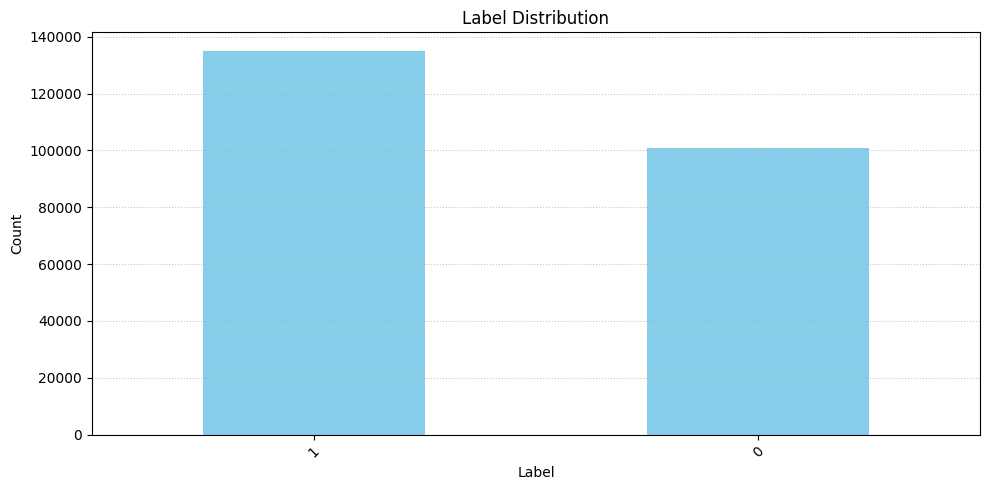

In [9]:
def analyze_and_visualize_label_distribution(df):
    print(df['label'].value_counts())
    plt.figure(figsize=(10, 5))
    df['label'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()
analyze_and_visualize_label_distribution(df)

In [ ]:
df.describe()

In [ ]:
df['label'].nunique()

In [ ]:
def data_cleaning(df):
    df.columns = df.columns.str.strip()
    print("Dataset Shape: ", df.shape)
    num = df._get_numeric_data()
    num[num < 0] = 0
data_cleaning(df)

In [ ]:
# label_encoder = LabelEncoder()
# label_encoded_cols = []

# for col in df.columns:
#     if df[col].dtype == 'object':
#         df[col] = label_encoder.fit_transform(df[col])
#         label_encoded_cols.append(col)

In [ ]:
# data subsampling and separating features and target variables
subsample_df=df.groupby('label').apply(pd.DataFrame.sample,frac=0.1).reset_index(drop=True)
x=subsample_df.drop(['label'],axis=1)
y=subsample_df['label']
# reducing the dimensionality into 2
pca=PCA(n_components=2, random_state=0)
z=pca.fit_transform(x)
# combining the principal components and labels into a DataFrame
pca_df=pd.DataFrame()
pca_df['label']=y
pca_df['PCA 1']=z[:,0]
pca_df['PCA 2']=z[:,1]
# visualizes the data in the reduced two-dimensional space
# which allows to explore potential patterns and relationships between the features and their labels
sns.scatterplot(data=pca_df,x='PCA 1',y='PCA 2',hue='label',palette=sns.color_palette('hls',len(pca_df.label.value_counts()))).set_title("PCA Projection")

plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

In [ ]:
new_df=df.copy()

In [ ]:
# creating a data frame with balanced data
size=len(df.loc[df.label==0])
print(size)
bal_df=df.groupby('label').apply(lambda x: x.sample(n=min(size,len(x))))
sns.countplot(data=bal_df,x='label')

In [ ]:
# feature scaling and label conversion to int
# applying normalization since we have label encoding
X=bal_df.drop(columns='label')
y=bal_df['label'].astype('int')
X=MinMaxScaler().fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape," ",X_test.shape)
print(y_train.shape," ",y_test.shape)

In [ ]:
Xn=new_df.drop(columns='label')
Xn=MinMaxScaler().fit_transform(Xn)
yn=new_df['label']
yn=LabelEncoder().fit_transform(yn)
Xn_train,Xn_test,yn_train,yn_test=train_test_split(Xn,yn,test_size=0.2)

In [ ]:
print(Xn_test.shape,Xn_train.shape)
print(yn_test.shape,yn_train.shape)

In [ ]:
def train_and_evaluate_cnn(X_train, y_train, X_test, y_test):
    # Reshape data for CNN
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define callbacks
    callbacks = [
        ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ]

    # Train the model with callbacks
    history = model.fit(
        X_train, y_train, 
        epochs=20, 
        batch_size=128, 
        validation_data=(X_test, y_test),
        callbacks=callbacks
    )

    # Plot training history
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

    # Confusion Matrix
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)  
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

best_model = train_and_evaluate_cnn(X_train, y_train, X_test, y_test)